# Model

## Imports

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import tqdm

## Load Data

In [13]:

# Load Data
PATH = '/Users/albertolandi/Documents/GitHub/ML2_Practice/ML2_Project'
data = pd.read_csv(f'{PATH}/dataset/AEP_hourly_preprocessed-v2.csv')

In [14]:
data.head()

,Datetime,AEP_MW,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Weekend,Quarter,Hour,Date,last_7_mean,last_14_mean,LastDay
0,2004-10-01 02:00:00,11935.0,2004,10,1,40,4,275,0,4,2,2004-10-01,12157.000000,12157.000000,12379.0
1,2004-10-01 03:00:00,11692.0,2004,10,1,40,4,275,0,4,3,2004-10-01,12002.000000,12002.000000,11935.0
2,2004-10-01 04:00:00,11597.0,2004,10,1,40,4,275,0,4,4,2004-10-01,11900.750000,11900.750000,11692.0
3,2004-10-01 05:00:00,11681.0,2004,10,1,40,4,275,0,4,5,2004-10-01,11856.800000,11856.800000,11597.0
4,2004-10-01 06:00:00,12280.0,2004,10,1,40,4,275,0,4,6,2004-10-01,11927.333333,11927.333333,11681.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121272 entries, 0 to 121271
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Datetime      121272 non-null  object 
 1   AEP_MW        121272 non-null  float64
 2   Year          121272 non-null  int64  
 3   Month         121272 non-null  int64  
 4   Day           121272 non-null  int64  
 5   WeekOfYear    121272 non-null  int64  
 6   DayOfWeek     121272 non-null  int64  
 7   DayOfYear     121272 non-null  int64  
 8   Weekend       121272 non-null  int64  
 9   Quarter       121272 non-null  int64  
 10  Hour          121272 non-null  int64  
 11  Date          121272 non-null  object 
 12  last_7_mean   121272 non-null  float64
 13  last_14_mean  121272 non-null  float64
 14  LastDay       121272 non-null  float64
dtypes: float64(4), int64(9), object(2)
memory usage: 13.9+ MB


In [16]:

data.describe()

,AEP_MW,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Weekend,Quarter,Hour,last_7_mean,last_14_mean,LastDay
count,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000,121272.000000
mean,15499.539449,2011.170047,6.500280,15.723341,26.497609,2.999505,182.418242,0.285606,2.503018,11.501674,15499.436209,15499.274685,15499.519411
std,2591.394257,4.011141,3.461454,8.802181,15.130015,1.999823,105.840556,0.451704,1.122194,6.921793,2412.679281,2148.146567,2591.408991
min,9581.000000,2004.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9805.285714,10458.357143,9581.000000
25%,13630.000000,2008.000000,4.000000,8.000000,13.000000,1.000000,91.000000,0.000000,2.000000,6.000000,13735.250000,13906.142857,13630.000000
50%,15310.000000,2011.000000,6.000000,16.000000,26.000000,3.000000,181.000000,0.000000,2.000000,12.000000,15272.357143,15262.285714,15310.000000
75%,17200.000000,2015.000000,10.000000,23.000000,40.000000,5.000000,276.000000,1.000000,4.000000,18.000000,17079.285714,16898.089286,17200.000000
max,25695.000000,2018.000000,12.000000,31.000000,53.000000,6.000000,366.000000,1.000000,4.000000,23.000000,24859.285714,23810.642857,25695.000000


## Feature and Target

In [17]:
# --- Feature and Target ---
X = data.drop(['Datetime', 'Date', 'AEP_MW'], axis=1)
y = data['AEP_MW']

## Scaling and Time Series Split

In [18]:

# --- Scaling (Fit on initial chunk, then just transform)---
scaler = StandardScaler()
initial_chunk_size = int(len(data) * 0.7) #Fit on the same "train" data as before
scaler.fit(X[:initial_chunk_size])
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) #convert to df

# --- TimeSeriesSplit ---
n_splits = 5  # Number of folds.  5 is a common choice.
tscv = TimeSeriesSplit(n_splits=n_splits)

## Models

In [19]:
# --- Model Initialization ---
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

## Hyperparameter Tuning

In [ ]:
# --- Hyperparameter Grids ---
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Random Forest': {
        'n_estimators': [50, 100],  
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
    }
}

## Cross-validation with Grid-SearchCV

In [ ]:
# Store results (including best hyperparameters)
all_results = {name: [] for name in models}

# --- Cross-Validation Loop with GridSearchCV ---
total_iterations = n_splits * len(models) #Folds * models
with tqdm.tqdm(total=total_iterations, desc="Cross-Validation with Tuning") as pbar:
    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        for model_name, model in models.items():
            # Create GridSearchCV object
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[model_name],
                scoring='neg_root_mean_squared_error',  # Use negative RMSE for maximization
                cv=3,  # Inner cross-validation (within the training set)
                n_jobs=-1, 
                verbose=0  
            )

            # Fit GridSearchCV (finds the best hyperparameters)
            grid_search.fit(X_train, y_train)

            # Get the best model (with the best hyperparameters)
            best_model = grid_search.best_estimator_

            # Evaluate the best model on the test set
            y_pred = best_model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Store results (including best hyperparameters)
            all_results[model_name].append({
                'rmse': rmse,
                'mae': mae,
                'r2': r2,
                'best_params': grid_search.best_params_  # Store best hyperparameters
            })
            pbar.update(1)

# --- Aggregate Results ---
final_results = {}
for model_name, fold_results in all_results.items():
    df = pd.DataFrame(fold_results)
    final_results[model_name] = {
        'mean_rmse': df['rmse'].mean(),
        'mean_mae': df['mae'].mean(),
        'mean_r2': df['r2'].mean(),
        'std_rmse': df['rmse'].std(),
        'std_mae': df['mae'].std(),
        'std_r2': df['r2'].std(),
        'best_params': df['best_params'].iloc[df['rmse'].idxmin()] # Best params overall
    }

# --- Display Results ---
final_results_df = pd.DataFrame(final_results).T
display(final_results_df)

# --- Find Best Model (based on mean CV RMSE) ---
best_model_name = min(final_results, key=lambda k: final_results[k]['mean_rmse'])
print(f"\nBest model (based on mean CV RMSE): {best_model_name}")


Cross-Validation with Tuning: 100%|██████████| 15/15 [09:06<00:00, 36.43s/it]


,mean_rmse,mean_mae,mean_r2,std_rmse,std_mae,std_r2,best_params
Linear Regression,425.749514,319.24065,0.971747,35.493397,23.557633,0.004495,{'fit_intercept': True}
Random Forest,272.622289,199.048715,0.988423,18.24808,7.366629,0.001526,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
KNN,515.89829,394.963577,0.958507,72.284027,51.718372,0.009695,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}"



Best model (based on mean CV RMSE): Random Forest


## Final Evaluation on Held-Out Test Set


In [ ]:
# --- Final Evaluation on Held-Out Test Set ---
final_train_size = 0.8
final_train_end = int(len(data) * final_train_size)
X_final_train = X_scaled[:final_train_end]
y_final_train = y[:final_train_end]
X_final_test = X_scaled[final_train_end:]
y_final_test = y[final_train_end:]

# --- Fit Best Model on the Final Training Set ---
best_model = models[best_model_name].set_params(**final_results[best_model_name]['best_params'])
best_model.fit(X_final_train, y_final_train)

# --- Evaluate Best Model on the Held-Out Test Set ---
y_final_pred = best_model.predict(X_final_test)

final_rmse = np.sqrt(mean_squared_error(y_final_test, y_final_pred))
final_mae = mean_absolute_error(y_final_test, y_final_pred)
final_r2 = r2_score(y_final_test, y_final_pred)

final_evaluation_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R2'],
    'Value': [final_rmse, final_mae, final_r2]
})

print(f"\n--- Final Evaluation on Held-Out Test Set ({best_model_name}) ---")
display(final_evaluation_df)


--- Final Evaluation on Held-Out Test Set (Random Forest) ---


,Metric,Value
0,RMSE,269.760410
1,MAE,200.721087
2,R2,0.987821


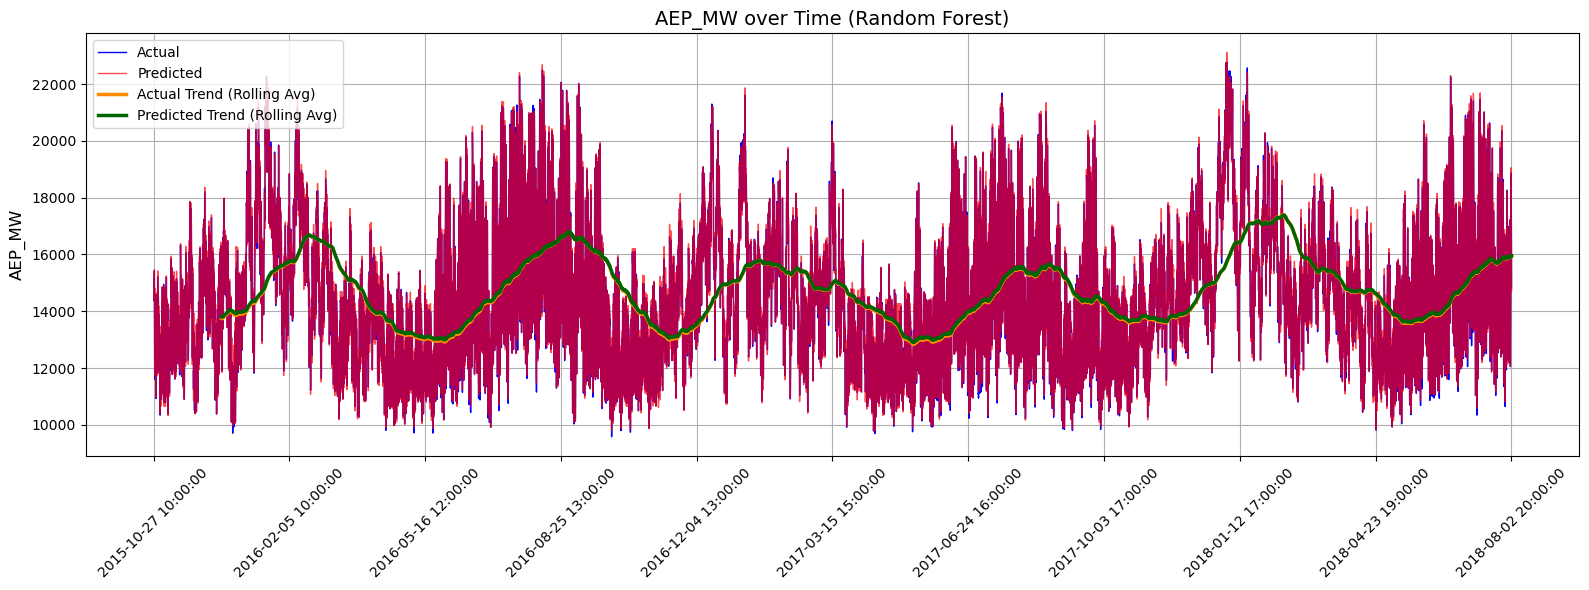

In [23]:

def plot_time_series_predictions(model, X_test, y_test, title, start_date=None, end_date=None):

    """
    Plots the actual and predicted values over time, with distinct trendlines.
    Args:
        model: The trained scikit-learn model.
        X_test: Test set features.
        y_test: Test set target values (AEP_MW).
        title: A string title for the plot.
        start_date: (Optional) Start date for plotting (datetime object or string).
        end_date: (Optional) End date for plotting (datetime object or string).
    """
    #Transform to df
    X_test = pd.DataFrame(X_test)

    y_pred = model.predict(X_test)

    # Create a DataFrame
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
    results_df = results_df.merge(data[['Datetime']], left_index=True, right_index=True)

    # Date filtering
    if start_date is not None:
        results_df = results_df[results_df['Datetime'] >= pd.to_datetime(start_date)]
    if end_date is not None:
        results_df = results_df[results_df['Datetime'] <= pd.to_datetime(end_date)]

    plt.figure(figsize=(16, 6))

    # Calculate trendlines
    window_size = int(len(results_df) * 0.05)
    window_size = max(window_size, 2)
    actual_trendline = results_df['Actual'].rolling(window=window_size).mean()
    predicted_trendline = results_df['Predicted'].rolling(window=window_size).mean()

    # Plot Actual and Predicted
    plt.plot(results_df['Datetime'], results_df['Actual'], label='Actual', color='blue', alpha=1, linewidth=1)
    plt.plot(results_df['Datetime'], results_df['Predicted'], label='Predicted', color='red', alpha=0.7, linewidth=1)

    #Trendlines
    plt.plot(results_df['Datetime'], actual_trendline, color='darkorange', linestyle='-', linewidth=2.5, label='Actual Trend (Rolling Avg)')
    plt.plot(results_df['Datetime'], predicted_trendline, color='darkgreen', linestyle='-', linewidth=2.5, label='Predicted Trend (Rolling Avg)')

    # Plot every few ticks
    tick_interval = len(results_df) // 10
    plt.xticks(results_df['Datetime'][::tick_interval], rotation=45)
    plt.ylabel('AEP_MW', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plot the final result
plot_time_series_predictions(best_model, X_final_test, y_final_test, title=f'AEP_MW over Time ({best_model_name})')